In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score, accuracy_score, \
                            precision_recall_curve, f1_score, fbeta_score, roc_auc_score, roc_curve, fbeta_score

In [29]:
#function for plotting ROC graph for any model will be used later
def curves(model, X_train, y_train, X_test, y_test):
    plt.figure(figsize=(20, 5))
    
    # ROC Curve
    plt.subplot(1, 3, 1)
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    
    plt.plot(fpr, tpr,lw=2)
    plt.plot([0,1],[0,1],c='violet',ls='--')
    plt.xlim([-0.05,1.05])
    plt.ylim([-0.05,1.05])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve for Credit Card Default');
    print("ROC AUC score = ", roc_auc_score(y_test, y_proba))
    
    # Precision and Recall Curves
    plt.subplot(1, 3, 2)
    precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, y_proba)
    
    plt.plot(threshold_curve, precision_curve[1:],label='precision')
    plt.plot(threshold_curve, recall_curve[1:], label='recall')
    plt.legend(loc='lower left')
    plt.xlabel('Threshold (Probablity)')
    plt.title('Precision and Recall Curves');
    
    # Precision and Recall Curves
    plt.subplot(1, 3, 3)
    plt.plot(recall_curve[1:], precision_curve[1:], label='precision')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve");

In [2]:
# Reading the data
df = pd.read_csv('CCs Challenge.csv', index_col=0)
df = df.rename(columns={'default.payment.next.month':'target'})   #renaming the target column to make it easy for coding
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
#data description
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_0      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

**From data description, there are no missing values and all feature are numerical so we do not need to worry about how we handle the missing values or converting the categorical features.**

### Detecting outliers or wrong data and removing them: 

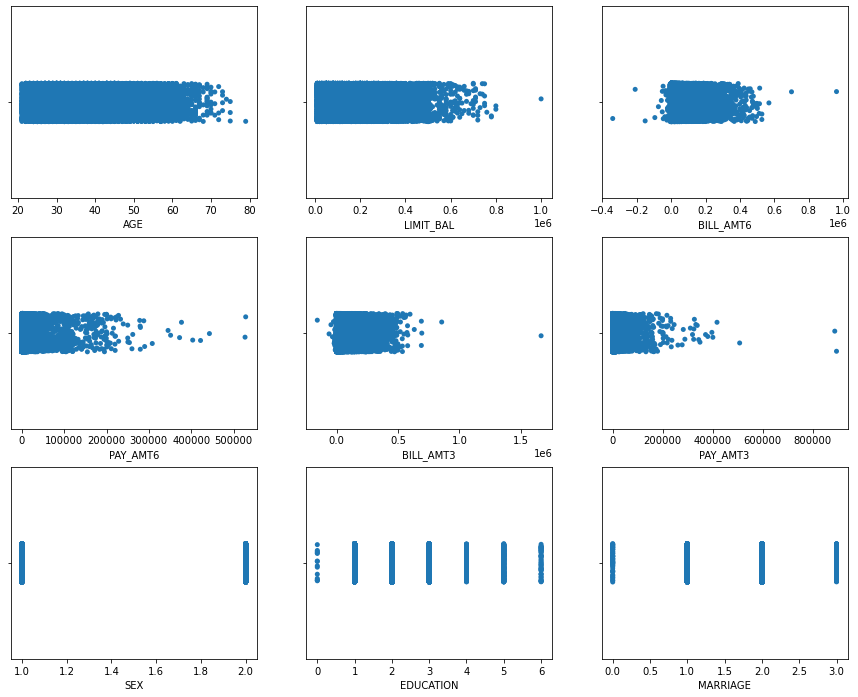

In [4]:
fig = plt.figure(figsize=(15,12))

ax = fig.add_subplot(331)
f1 = sns.stripplot(x="AGE", data=df, ax=ax)

ax = fig.add_subplot(332)
f2 = sns.stripplot(x="LIMIT_BAL", data=df, ax=ax)

ax = fig.add_subplot(333)
f3 = sns.stripplot(x="BILL_AMT6", data=df, ax=ax)

ax = fig.add_subplot(334)
f4 = sns.stripplot(x="PAY_AMT6", data=df, ax=ax)

ax = fig.add_subplot(335)
f5 = sns.stripplot(x="BILL_AMT3", data=df, ax=ax)

ax = fig.add_subplot(336)
f6 = sns.stripplot(x="PAY_AMT3", data=df, ax=ax)

ax = fig.add_subplot(337)
f7 = sns.stripplot(x="SEX", data=df, ax=ax)

ax = fig.add_subplot(338)
f8 = sns.stripplot(x="EDUCATION", data=df, ax=ax)

ax = fig.add_subplot(339)
f9 = sns.stripplot(x="MARRIAGE", data=df, ax=ax)

In [5]:
#drop outliers and wrong data
df = df[df.LIMIT_BAL < 800000]

df = df[df.BILL_AMT6 > 0]
df = df[df.BILL_AMT6 < 600000]
df = df[df.BILL_AMT5 > 0]
df = df[df.BILL_AMT5 < 600000]
df = df[df.BILL_AMT4 > 0]
df = df[df.BILL_AMT4 < 600000]
df = df[df.BILL_AMT3 > 0]
df = df[df.BILL_AMT3 < 600000]
df = df[df.BILL_AMT2 > 0]
df = df[df.BILL_AMT2 < 600000]
df = df[df.BILL_AMT1 > 0]
df = df[df.BILL_AMT1 < 600000]

df = df[df.PAY_AMT6 < 600000]
df = df[df.PAY_AMT5 < 600000]
df = df[df.PAY_AMT4 < 600000]
df = df[df.PAY_AMT3 < 600000]
df = df[df.PAY_AMT2 < 600000]
df = df[df.PAY_AMT1 < 600000]

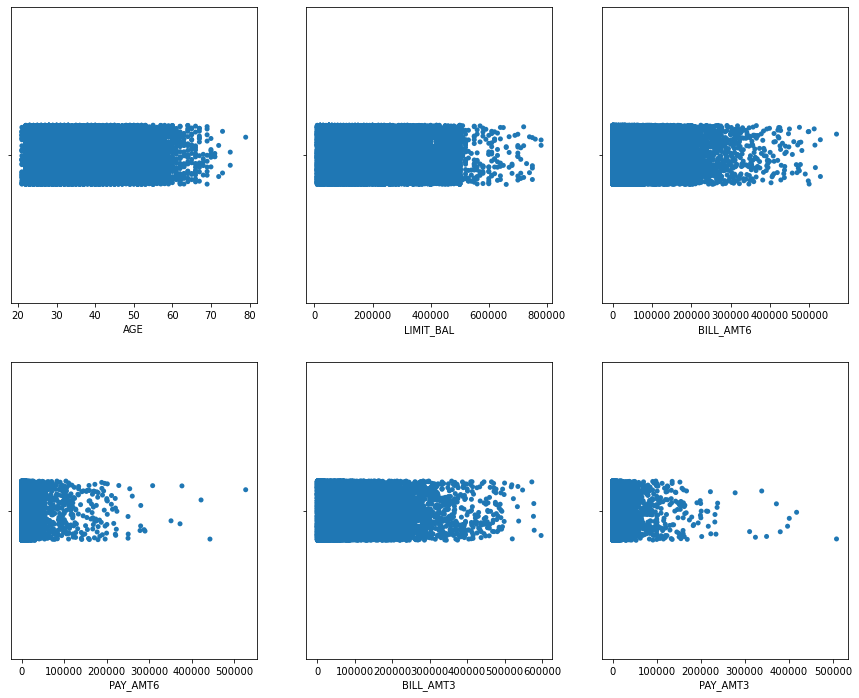

In [6]:
fig2 = plt.figure(figsize=(15,12))

ax = fig2.add_subplot(231)
f1 = sns.stripplot(x="AGE", data=df, ax=ax)

ax = fig2.add_subplot(232)
f2 = sns.stripplot(x="LIMIT_BAL", data=df, ax=ax)

ax = fig2.add_subplot(233)
f3 = sns.stripplot(x="BILL_AMT6", data=df, ax=ax)

ax = fig2.add_subplot(234)
f4 = sns.stripplot(x="PAY_AMT6", data=df, ax=ax)

ax = fig2.add_subplot(235)
f5 = sns.stripplot(x="BILL_AMT3", data=df, ax=ax)

ax = fig2.add_subplot(236)
f6 = sns.stripplot(x="PAY_AMT3", data=df, ax=ax)

In [7]:
#counting the target values
target_count = df['target'].value_counts()
target_count

0    17300
1     5064
Name: target, dtype: int64

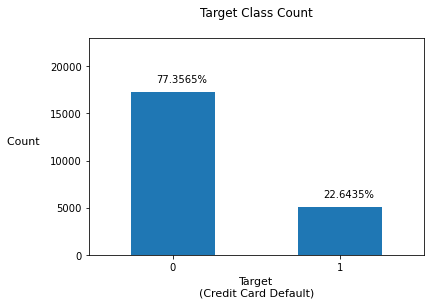

In [8]:
#check the balance of our data from our target

ax = target_count.plot(kind='bar', title='Target Class Count\n', rot=0)
ax.set_xlabel('Target\n(Credit Card Default)', size = 11)
ax.set_ylabel('Count             ', size = 11, rotation = 0)
ax.set_ylim(0, 23000)

values = [17300, 5064]

for index, value in enumerate(values):
    plt.text(index-0.1, value+1000, str(round(value/sum(values)*100, 4)) + "%");

**The data is imbalanced as expected so we should consider it during choosing the classification algorithm and the evaluation metrics.**

### EDA for features:

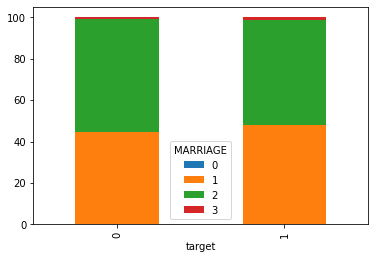

In [9]:
df.groupby(['target', 'MARRIAGE']).size()\
    .groupby(level=0).apply(lambda x: 100*x/x.sum())\
    .unstack().plot(kind='bar', stacked=True);

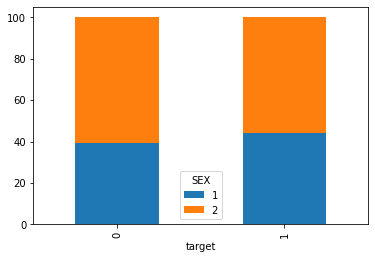

In [10]:
df.groupby(['target', 'SEX']).size()\
    .groupby(level=0).apply(lambda x: 100*x/x.sum())\
    .unstack().plot(kind='bar', stacked=True);

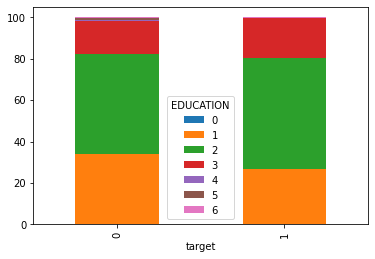

In [11]:
df.groupby(['target', 'EDUCATION']).size()\
    .groupby(level=0).apply(lambda x: 100*x/x.sum())\
    .unstack().plot(kind='bar', stacked=True);

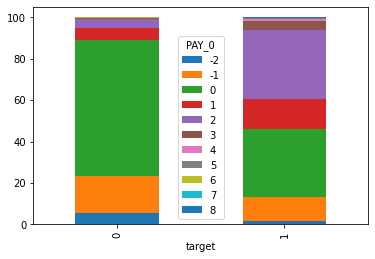

In [12]:
df.groupby(['target', 'PAY_0']).size()\
    .groupby(level=0).apply(lambda x: 100*x/x.sum())\
    .unstack().plot(kind='bar', stacked=True);

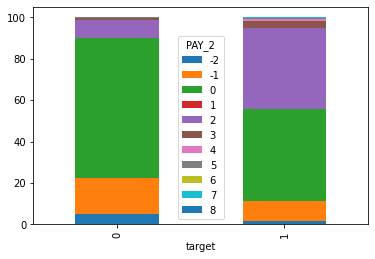

In [13]:
df.groupby(['target', 'PAY_2']).size()\
    .groupby(level=0).apply(lambda x: 100*x/x.sum())\
    .unstack().plot(kind='bar', stacked=True);

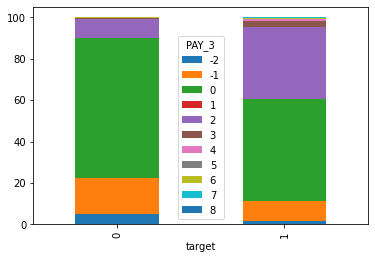

In [14]:
df.groupby(['target', 'PAY_3']).size()\
    .groupby(level=0).apply(lambda x: 100*x/x.sum())\
    .unstack().plot(kind='bar', stacked=True);

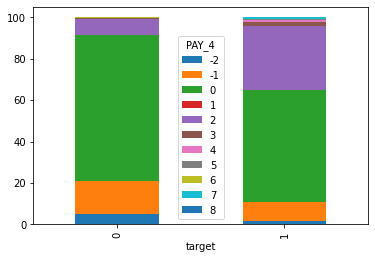

In [15]:
df.groupby(['target', 'PAY_4']).size()\
    .groupby(level=0).apply(lambda x: 100*x/x.sum())\
    .unstack().plot(kind='bar', stacked=True);

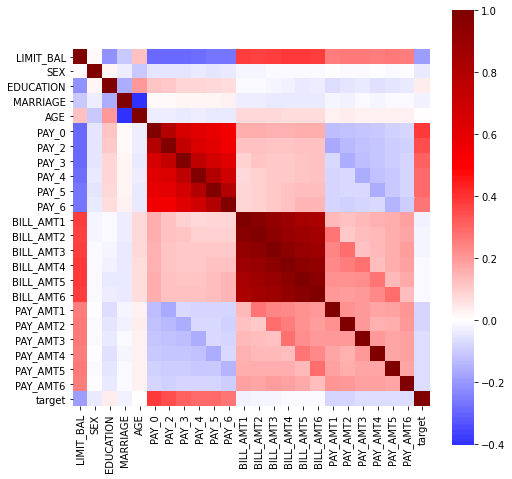

In [16]:
# heatmap of all columns 
corr = df.corr()
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr, square=True, ax=ax, cmap='seismic', center= 0.0)
plt.xticks(fontsize=10);
plt.yticks(fontsize=10);

**From the above figure, we notice that none of the features has high correlation with our target. Also, repayment status columns or amount of bill statments columns are high correlated which make sense since months are related to what happened in previous months.**

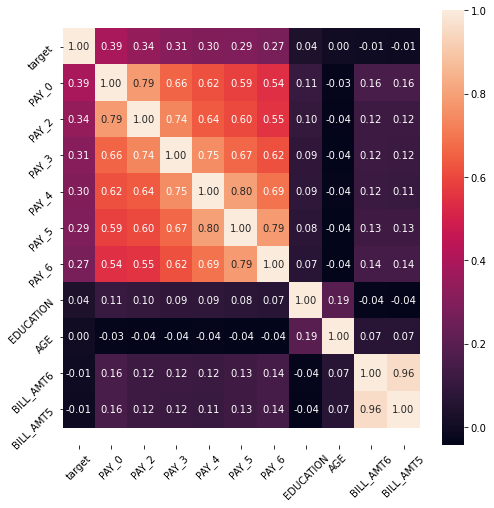

In [17]:
# checking the top 10 features correlated with our target
corr = df.corr()
cols = corr.nlargest(11, 'target')['target'].index 
corr = df[cols].corr()
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr, ax=ax, xticklabels=cols, yticklabels=cols, fmt='.2f',annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(rotation=45) 
plt.yticks(rotation=45);

**The biggest number of correlation with our target is 0.39 (repayment status for September)which does not represent high correlation. This coorelation test gives us incidence about what the key predictors when we do feature selection or feature importance.**

In [ ]:
#more visualiztion for comparing features together
sns.pairplot(df[cols]);

### Splitting data for training and testing:

In [18]:
#splitting data
y = df['target']
x = df.drop(labels = 'target', axis=1).astype("float64")
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

### Gradient Boosting Classifier

In [19]:
#GBC

GBC = GradientBoostingClassifier()

In [21]:
GBC.fit(x_train, y_train)

GradientBoostingClassifier()

In [22]:
feature_importances_gbc = sorted(zip(x_train.columns, GBC.feature_importances_), reverse=True, key=lambda x: x[1])
feature_df_gbc = pd.DataFrame(feature_importances_gbc, columns=['Features by GBC', 'importance'])

In [23]:
feature_df_gbc

,Features by GBC,importance
0,PAY_0,0.695643
1,PAY_5,0.031985
2,PAY_3,0.030942
3,LIMIT_BAL,0.027040
4,PAY_AMT2,0.024782
5,PAY_AMT3,0.022646
6,PAY_6,0.022080
7,BILL_AMT1,0.017929
8,PAY_2,0.017598
9,PAY_AMT1,0.014070


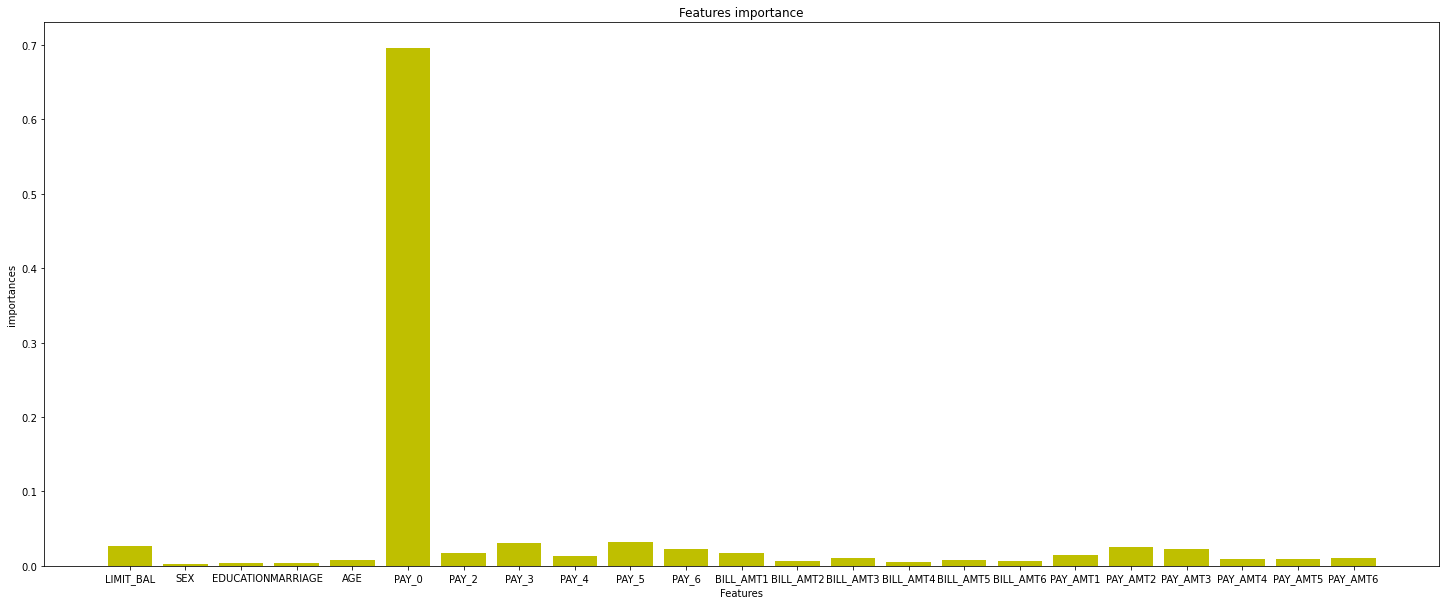

In [24]:
imp_cols_gbc = x.columns[GBC.feature_importances_ > 0.0]
vals_gbc = GBC.feature_importances_[GBC.feature_importances_ > 0.0]

plt.figure(figsize=(25,10))
plt.title("Features importance")
plt.bar(imp_cols_gbc,vals_gbc,
       color="y",  align="center")
plt.xlabel('Features')
plt.ylabel('importances')
plt.show()

In [25]:
GBC.score(x_train, y_train)

0.8338443848217708

In [26]:
GBC.score(x_test, y_test)

0.8286140089418778

In [27]:
y_pred = GBC.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[4911,  345],
       [ 805,  649]], dtype=int64)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      5256
           1       0.65      0.45      0.53      1454

    accuracy                           0.83      6710
   macro avg       0.76      0.69      0.71      6710
weighted avg       0.81      0.83      0.82      6710



GradientBoostingClassifier
ROC AUC score =  0.7943300274893801


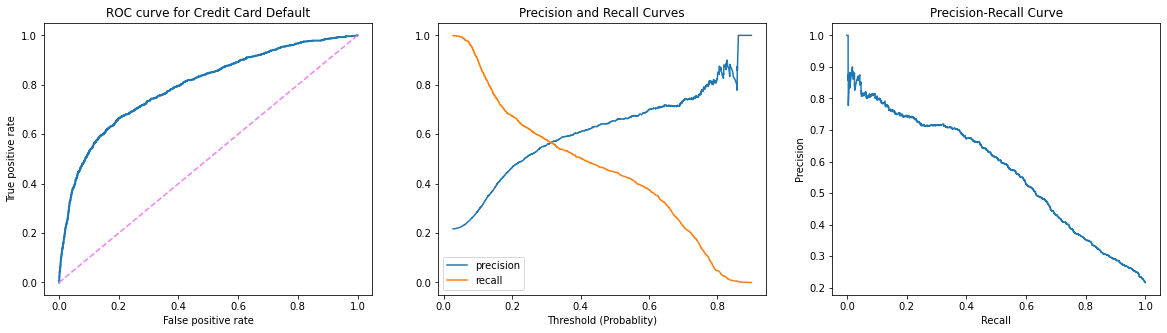

In [30]:
print("GradientBoostingClassifier")
curves(GBC, x_train, y_train, x_test, y_test)

### Random Forest 

In [31]:
#RF

RF = RandomForestClassifier(bootstrap=True, max_depth = 7, min_samples_split=7)

In [32]:
RF.fit(x_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_split=7)

In [33]:
feature_importances_rf = sorted(zip(x_train.columns, RF.feature_importances_), reverse=True, key=lambda x: x[1])
feature_df_rf = pd.DataFrame(feature_importances_rf, columns=['Features by RF', 'importance'])

In [34]:
feature_df_rf

,Features by RF,importance
0,PAY_0,0.288377
1,PAY_2,0.137087
2,PAY_3,0.106818
3,PAY_5,0.077705
4,PAY_4,0.066261
5,PAY_AMT1,0.040181
6,PAY_6,0.036879
7,PAY_AMT2,0.032777
8,LIMIT_BAL,0.029546
9,PAY_AMT3,0.025909


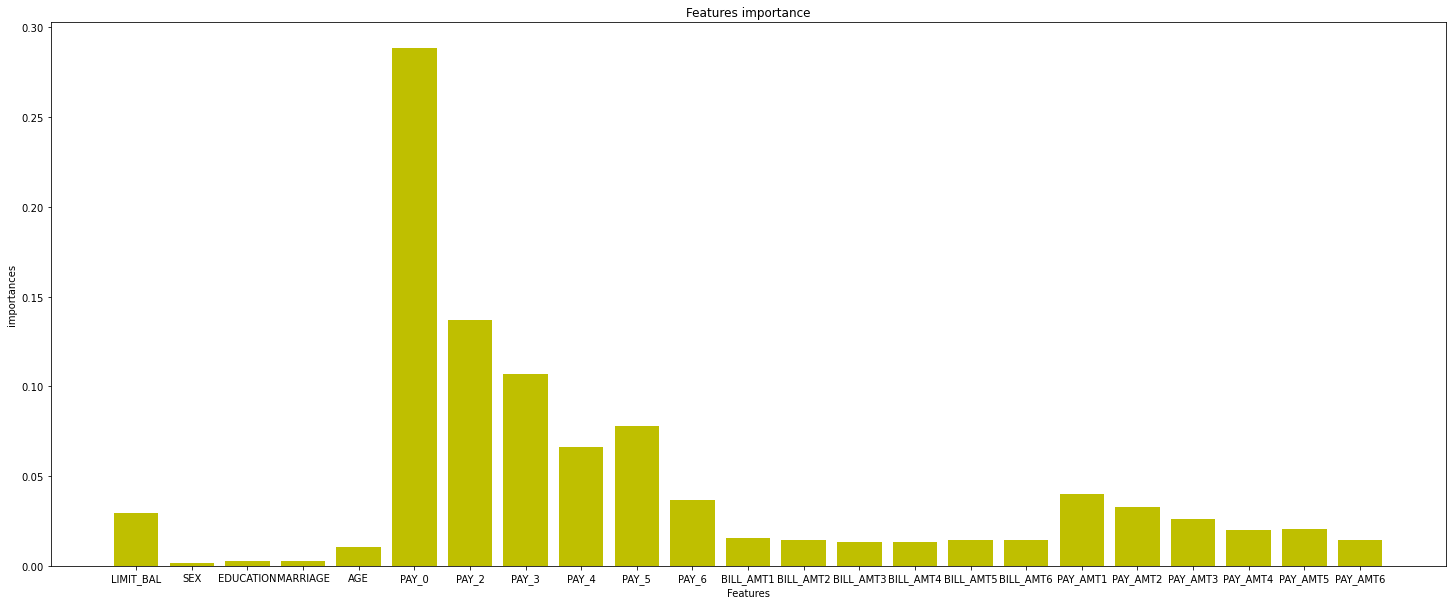

In [35]:
imp_cols = x.columns[RF.feature_importances_ > 0.0]
vals = RF.feature_importances_[RF.feature_importances_ > 0.0]

plt.figure(figsize=(25,10))
plt.title("Features importance")
plt.bar(imp_cols,vals,
       color="y",  align="center")
plt.xlabel('Features')
plt.ylabel('importances')
plt.show()

In [36]:
y_pred_rf = RF.predict(x_test)

In [37]:
RF.score(x_train, y_train)

0.8432349559218091

In [38]:
RF.score(x_test, y_test)

0.8302533532041729

In [39]:
confusion_matrix(y_test, y_pred_rf)

array([[4937,  319],
       [ 820,  634]], dtype=int64)

In [40]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      5256
           1       0.67      0.44      0.53      1454

    accuracy                           0.83      6710
   macro avg       0.76      0.69      0.71      6710
weighted avg       0.82      0.83      0.82      6710



RandomForesttClassifier
ROC AUC score =  0.7948192829731241


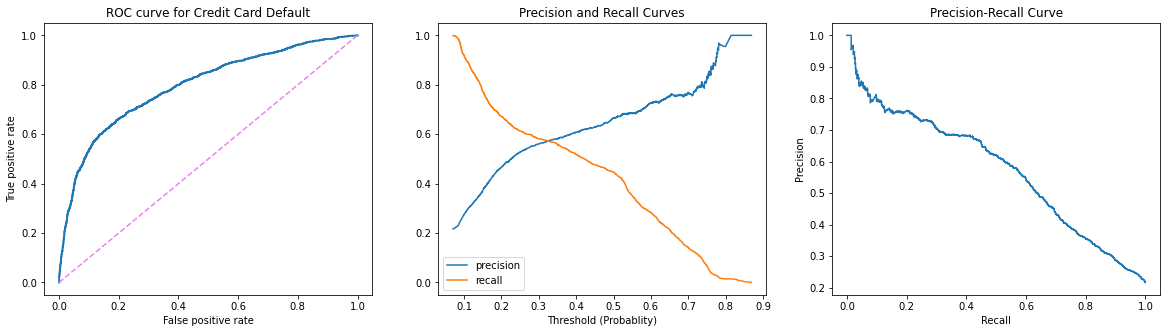

In [41]:
print("RandomForesttClassifier")
curves(RF, x_train, y_train, x_test, y_test)

### Logistic Regression 

In [42]:
#LR
LR = LogisticRegression(solver='liblinear', C=1, penalty='l1').fit(x_train, y_train)

In [43]:
LR.score(x_train, y_train)

0.8176823814999361

In [44]:
LR.score(x_test, y_test)

0.8232488822652757

In [45]:
y_pred_lr = LR.predict(x_test)
confusion_matrix(y_test, y_pred_lr)

array([[5026,  230],
       [ 956,  498]], dtype=int64)

In [46]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      5256
           1       0.68      0.34      0.46      1454

    accuracy                           0.82      6710
   macro avg       0.76      0.65      0.68      6710
weighted avg       0.81      0.82      0.80      6710



LogisticRegression
ROC AUC score =  0.7545681728250835


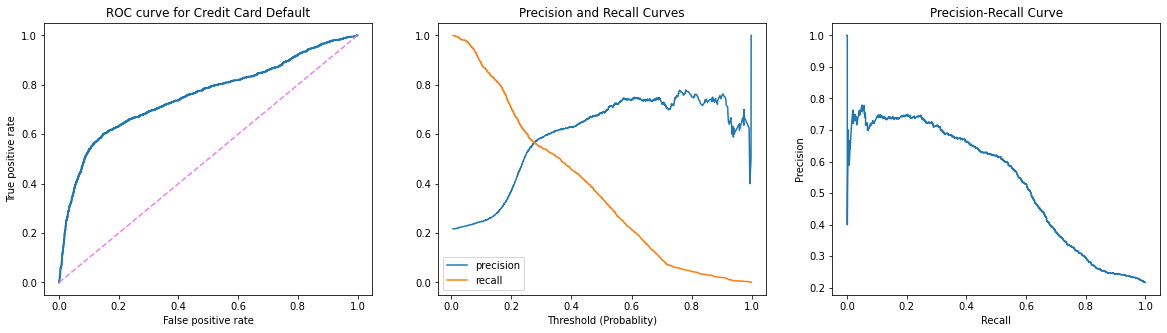

In [47]:
print("LogisticRegression")
curves(LR, x_train, y_train, x_test, y_test)

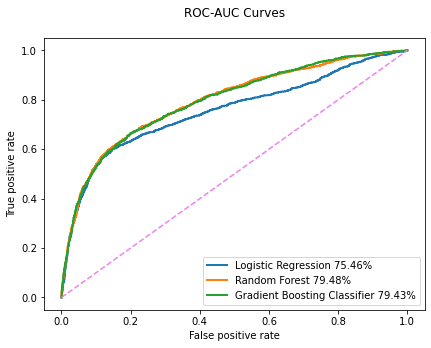

In [48]:
#ploting ROC curve for all together
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)

fpr, tpr, thresholds = roc_curve(y_test, LR.predict_proba(x_test)[:,1])
score = str(round(roc_auc_score(y_test, LR.predict_proba(x_test)[:,1])*100, 2)) + "%"
plt.plot(fpr, tpr,lw=2, label='Logistic Regression %s' % score)

fpr, tpr, thresholds = roc_curve(y_test, RF.predict_proba(x_test)[:,1])
score = str(round(roc_auc_score(y_test, RF.predict_proba(x_test)[:,1])*100, 2)) + "%"
plt.plot(fpr, tpr,lw=2, label='Random Forest %s' % score)

fpr, tpr, thresholds = roc_curve(y_test, GBC.predict_proba(x_test)[:,1])
score = str(round(roc_auc_score(y_test, GBC.predict_proba(x_test)[:,1])*100, 2)) + "%"
plt.plot(fpr, tpr,lw=2, label='Gradient Boosting Classifier %s' % score)

plt.legend()
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC-AUC Curves\n');

### Random forest after feature selection 

In [49]:
selected_features = x.loc[:,RF.feature_importances_>0.027].copy()


selected_features.head()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2
ID,,,,,,,,,
2,120000.0,-1.0,2.0,0.0,0.0,0.0,2.0,0.0,1000.0
3,90000.0,0.0,0.0,0.0,0.0,0.0,0.0,1518.0,1500.0
4,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.0,2019.0
5,50000.0,-1.0,0.0,-1.0,0.0,0.0,0.0,2000.0,36681.0
6,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,2500.0,1815.0


In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(selected_features, y, test_size = 0.3, random_state = 42)

In [51]:
RF1 = RandomForestClassifier(bootstrap=True, max_depth = 7, min_samples_split=7)

In [52]:
RF1.fit(X_train, Y_train)

RandomForestClassifier(max_depth=7, min_samples_split=7)

In [53]:
Y_pred_rf =RF1.predict(X_test)

In [54]:
RF1.score(X_train, Y_train)

0.8365912865721221

In [55]:
RF1.score(X_test, Y_test)

0.8280178837555887

In [56]:
print(classification_report(Y_test, Y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      5256
           1       0.65      0.45      0.53      1454

    accuracy                           0.83      6710
   macro avg       0.75      0.69      0.71      6710
weighted avg       0.81      0.83      0.82      6710



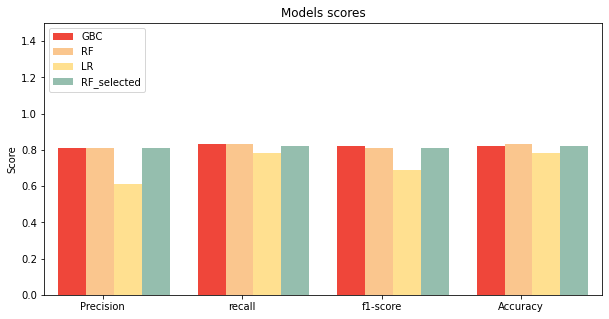

In [57]:
barWidth = 0.9
#GBC_scores = [0.81, 0.83, 0.82, 0.82]
#RF_scores = [0.81, 0.83, 0.81, 0.83]
#LR_scores = [0.61,0.78, 0.69, 0.78]
#RF_selected_scores = [0.81, 0.82, 0.81, 0.82]


    # Creating dataframe
scores_data = {'name': ['Precision', 'recall', 'f1-score', 'Accuracy'],
                'GBC': [0.81, 0.83, 0.82, 0.82],
                'RF': [0.81, 0.83, 0.81, 0.83],
                'LR': [0.61,0.78, 0.69, 0.78],
                'RF_selected': [0.81, 0.82, 0.81, 0.82]}
df = pd.DataFrame(scores_data, columns = ['name', 'GBC', 'RF', 'LR','RF_selected'])

# Setting the positions and width for the bars
pos = list(range(4))
width = 0.2

    # Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(pos, df['GBC'], width, alpha=0.9, color='#EE3224')
plt.bar([p + width for p in pos], df['RF'], width, alpha=0.5, color='#F78F1E')
plt.bar([p + width*2 for p in pos], df['LR'], width, alpha=0.5, color='#FFC222')
plt.bar([p + width*3 for p in pos], df['RF_selected'], width, alpha=0.5, color='#2d7f5e')

    # Setting the y axis label
ax.set_ylabel('Score')

    # Setting the chart's title
ax.set_title('Models scores')

    # Setting the position of the x ticks
ax.set_xticks([p + 1.1 * width for p in pos])

    # Setting the labels for the x ticks
ax.set_xticklabels(df['name'])

    # Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0,1.5] )

    # Adding the legend and showing the plot
plt.legend(['GBC', 'RF', 'LR', 'RF_selected'], loc='upper left')
#plt.grid()
plt.show()
